In [1]:
import warnings
warnings.filterwarnings( 'ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

# Preparing Data for training a model

In [2]:
df=pd.read_csv("train_data.csv")
df.head()

,Unnamed: 0,tweets,label
0,0,guccitwist i should be killed for being a whit...,1
1,1,RT DipOnline I be closing my eyes and shit som...,1
2,2,Par billi sekabhi nhiI hate cat httpstwitterco...,1
3,3,LILBTHEBASEDGOD Im a dirty ass nigga with a cl...,1
4,4,the army life ‰ã¢ÌöÌÏ,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130366 entries, 0 to 130365
Data columns (total 3 columns):
Unnamed: 0    130366 non-null int64
tweets        130289 non-null object
label         130366 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.0+ MB


In [4]:
df['label'].value_counts()

1    77681
0    52685
Name: label, dtype: int64

Text(0.5, 1.0, 'Dataset labels distribuition')

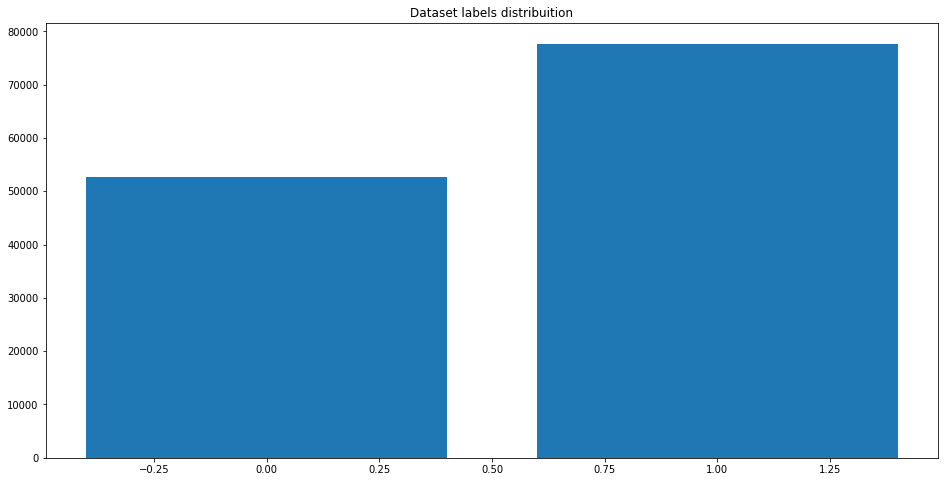

In [6]:
from collections import Counter
target_cnt = Counter(df.label)
plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [122]:
df.dropna(axis=0,inplace=True)

In [124]:
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [125]:
# Keep the alphabets and lemmaztize the text
df['text_lemmatize'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in df['tweets']]

In [126]:
df.head()

,Unnamed: 0,tweets,label,text_lemmatize
0,0,guccitwist i should be killed for being a whit...,1,guccitwist i should be killed for being a whit...
1,1,RT DipOnline I be closing my eyes and shit som...,1,RT DipOnline I be closing my eyes and shit som...
2,2,Par billi sekabhi nhiI hate cat httpstwitterco...,1,Par billi sekabhi nhiI hate cat httpstwitterco...
3,3,LILBTHEBASEDGOD Im a dirty ass nigga with a cl...,1,LILBTHEBASEDGOD Im a dirty ass nigga with a cl...
4,4,the army life ‰ã¢ÌöÌÏ,0,the army life


In [128]:
y=df.pop('label')

In [129]:
X_train,X_test,y_train,y_test=train_test_split(df['text_lemmatize'],y,test_size=0.3,random_state=100)

In [130]:
vec=TfidfVectorizer().fit(X_train)

In [131]:
vec_X_train = vec.transform(X_train)
vec_X_test = vec.transform(X_test)

In [132]:
vec_X_train.shape

(91202, 69439)

# Analyzing Various Machine Learning Models

## Area Under Curve (AUC)

In [133]:
def draw_roc( actual, predicted,model):
    from sklearn import metrics
    from matplotlib import pyplot as plt
    fpr, tpr, thresholds = metrics.roc_curve( actual, predicted,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, predicted )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig(model+'_auc.png')
    plt.show()

## 1. Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     15658
           1       0.94      0.88      0.91     23429

    accuracy                           0.90     39087
   macro avg       0.89      0.90      0.89     39087
weighted avg       0.90      0.90      0.90     39087


Confusion Matrix:

 [[14353  1305]
 [ 2767 20662]]

Test Accuracy: 89.58%


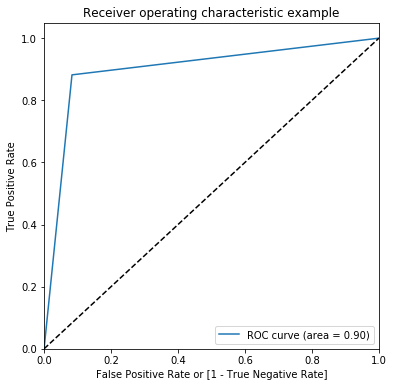

In [138]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(vec_X_train,y_train)
y_pred=lr.predict(vec_X_test)

from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:\n')
print(classification_report(y_test,y_pred))
print('\nConfusion Matrix:\n\n',confusion_matrix(y_test,y_pred))  

from  sklearn.metrics import accuracy_score
print('\nTest Accuracy: {}%'.format('%.2f'%(accuracy_score(y_test,y_pred)*100)))

draw_roc(y_test,y_pred,'lr')

## 2. Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     15658
           1       0.91      0.90      0.91     23429

    accuracy                           0.89     39087
   macro avg       0.88      0.89      0.89     39087
weighted avg       0.89      0.89      0.89     39087


Confusion Matrix:

 [[13661  1997]
 [ 2315 21114]]

Test Accuracy: 88.97%


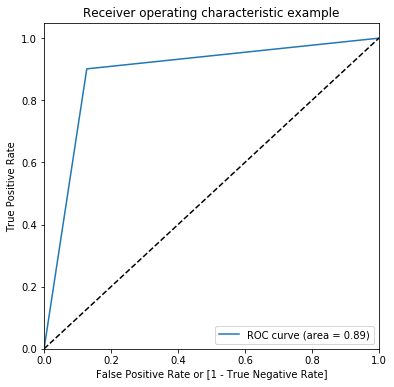

In [136]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(vec_X_train,y_train)
y_pred=dt.predict(vec_X_test)

from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:\n')
print(classification_report(y_test,y_pred))
print('\nConfusion Matrix:\n\n',confusion_matrix(y_test,y_pred))  

from  sklearn.metrics import accuracy_score
print('\nTest Accuracy: {}%'.format('%.2f'%(accuracy_score(y_test,y_pred)*100)))

draw_roc(y_test,y_pred,'dtree')

## 3. Gradient Boosting Classifier

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.97      0.84     15658
           1       0.98      0.77      0.86     23429

    accuracy                           0.85     39087
   macro avg       0.86      0.87      0.85     39087
weighted avg       0.88      0.85      0.85     39087


Confusion Matrix:

 [[15249   409]
 [ 5351 18078]]

Test Accuracy: 85.26%


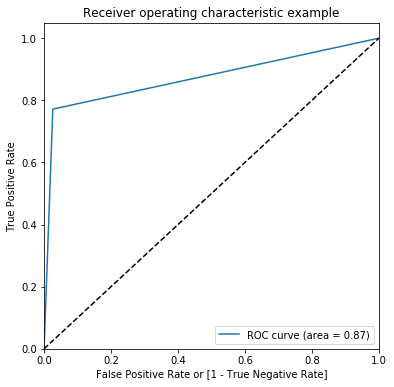

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(vec_X_train,y_train)
y_pred=gbc.predict(vec_X_test)


from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:\n')
print(classification_report(y_test,y_pred))
print('\nConfusion Matrix:\n\n',confusion_matrix(y_test,y_pred))  

from  sklearn.metrics import accuracy_score
print('\nTest Accuracy: {}%'.format('%.2f'%(accuracy_score(y_test,y_pred)*100)))

draw_roc(y_test,y_pred,'xgboost')

## 4. Neural Network

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     15658
           1       0.92      0.93      0.92     23429

    accuracy                           0.90     39087
   macro avg       0.90      0.90      0.90     39087
weighted avg       0.90      0.90      0.90     39087


Confusion Matrix:

 [[13669  1989]
 [ 1755 21674]]

Test Accuracy: 90.42%


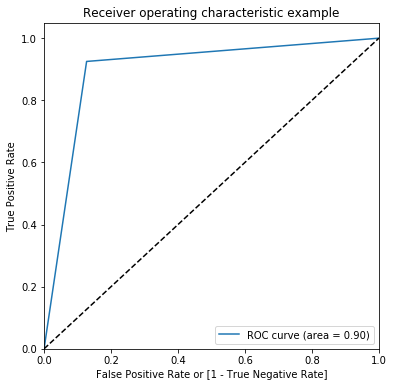

In [137]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(vec_X_train,y_train)
y_pred=mlp.predict(vec_X_test)

from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:\n')
print(classification_report(y_test,y_pred))
print('\nConfusion Matrix:\n\n',confusion_matrix(y_test,y_pred))  

from  sklearn.metrics import accuracy_score
print('\nTest Accuracy: {}%'.format('%.2f'%(accuracy_score(y_test,y_pred)*100)))

draw_roc(y_test,y_pred,'mlp')

# Training the Neural Network

In [139]:
df=pd.read_csv("train_data.csv")
df.head()

,Unnamed: 0,tweets,label
0,0,guccitwist i should be killed for being a whit...,1
1,1,RT DipOnline I be closing my eyes and shit som...,1
2,2,Par billi sekabhi nhiI hate cat httpstwitterco...,1
3,3,LILBTHEBASEDGOD Im a dirty ass nigga with a cl...,1
4,4,the army life ‰ã¢ÌöÌÏ,0


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [ ]:
df.dropna(axis=0,inplace=True)
temp=[''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in df['tweets']]
df['text_lemmatize']=temp

In [ ]:
X_train=df['text_lemmatize']
y_train=df['label']

In [ ]:
vec=TfidfVectorizer().fit(X_train)
vec_X_train = vec.transform(X_train)

In [132]:
vec_X_train.shape

(91202, 69439)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(vec_X_train,y_train)

# Recognizing hate speech in the collected data

In [140]:
df1=pd.read_csv("tweets.csv")
df1.head()

,Unnamed: 0,tweets
0,0,We have approximately 8 and a half months befo...
1,1,RT @MarkPinnix: Third Party candidates Justin ...
2,2,RT @MarkPinnix: Third Party candidates Justin ...
3,3,RT @MarkPinnix: Third Party candidates Justin ...
4,4,Every nation gets the government it deserves.\...


### Cleaning and Preprocessing

In [141]:
df1.dropna(axis=0,inplace=True)

In [142]:
import string
def remove_punctuation(s):
    punc=string.punctuation.replace('!','')
    punc=punc.replace('?','')
    punc=punc.replace('#','')
    s = ''.join([i for i in s if i not in frozenset(punc)])
    return s

l1=df1['tweets'].apply(remove_punctuation)

In [143]:
l1=[' '.join([i for i in a.split() if ('http' not in i or 'www.' not in i) and '#' not in i]) for a in l1]

In [145]:
l2 = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in l1]

In [146]:
X_test=l2

In [147]:
vec_X_test = vec.transform(X_test)

In [149]:
vec_X_test.shape

(28698, 81276)

In [150]:
y_pred=mlp.predict(vec_X_test)

In [151]:
df1['label']=y_pred

In [152]:
from sklearn.utils import shuffle
df1=shuffle(df1)
df1.head()

,Unnamed: 0,tweets,label
5802,5802,If you believe COVID-19 will return in the fal...,1
27827,27827,This is why we need to mail-in ballots across ...,0
1804,1804,RT @MarkPinnix: So #CreepyJoe who has multiple...,1
27831,27831,RT @Vote4Progress: Which party will be you vot...,1
11008,11008,RT @LawyersComm: Every state should be taking ...,0


In [154]:
df1.to_csv('prediction.csv',index=None)

# Sentiment Analysis of the tweets

In [155]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df1['polarity']=[sid.polarity_scores(i)['compound'] for i in l1]

In [156]:
df1.head()

,Unnamed: 0,tweets,label,polarity
5802,5802,If you believe COVID-19 will return in the fal...,1,0.0000
27827,27827,This is why we need to mail-in ballots across ...,0,0.4019
1804,1804,RT @MarkPinnix: So #CreepyJoe who has multiple...,1,0.4019
27831,27831,RT @Vote4Progress: Which party will be you vot...,1,0.4019
11008,11008,RT @LawyersComm: Every state should be taking ...,0,0.0000


In [157]:
df1.to_csv('prediction+polarities.csv',index=None)

# Topic Modelling

In [158]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(l1)
dtm

<28698x12053 sparse matrix of type '<class 'numpy.int64'>'
	with 265170 stored elements in Compressed Sparse Row format>

In [159]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=7,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [160]:
import random
for i in range(10):
    random_word_id = random.randint(0,len(LDA.components_[0]))
    print(cv.get_feature_names()[random_word_id])

suppress
resign
affiliates
nunezdotrich
accusations
dream
christianity
grocery
httpstcolrrjj1i66d
httpstcodwq1wfcldp


In [161]:
for i in range(10):
    random_word_id = random.randint(0,len(LDA.components_[0]))
    print(cv.get_feature_names()[random_word_id])

httpstcothucroq3as
disruptionary
stunt
inorder
embraced
doe
httpstcoxrfihc1wz6
sadistic
choo
cohousedems


In [162]:
single_topic = LDA.components_[0]

In [163]:
top_word_indices = single_topic.argsort()[-10:]
for index in top_word_indices:
    print(cv.get_feature_names()[index])

curveball
ad
new
af
afbranco
branco
cartoon
election
2020
rt


In [164]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['trump', 'failure', 'httpst', 'exactly', 'httpstcojxiwfghdcl', 'curveball', 'ad', 'new', 'af', 'afbranco', 'branco', 'cartoon', 'election', '2020', 'rt']


THE TOP 15 WORDS FOR TOPIC #1
['findings', 'approve', 'monday', 'home', 'ohio', 'key', 'right', 'vote', 'poll', 'joebiden', 'needs', 'ritamollerpalma', 'state', 'realdonaldtrump', 'rt']


THE TOP 15 WORDS FOR TOPIC #2
['biden', 'need', 'support', 'time', 'republicans', 'political', 'president', 'china', 'new', 'americans', 'coronavirus', 'amp', 'trump', 'realdonaldtrump', 'rt']


THE TOP 15 WORDS FOR TOPIC #3
['voters', 'gop', 'election', 'win', 'president', 'joe', 'biden', 'pollsofpolitics', 'retweet', 'november', 'voting', 'joebiden', 'realdonaldtrump', 'vote', 'rt']


THE TOP 15 WORDS FOR TOPIC #4
['ppl', 'said', 'mailin', 'sumoh7', 'demswork4usa', 'says', 'support', 'epochtimes', 'core', 'idea', 'presidential', 'don', 'think', 'candidates', 'rt']


THE TOP 15 WORDS FOR TOPIC #5
['cash', 'month', 'p